# Experiment 5: Aleatory Linear and Circle

This experiment explores the differences between Linear and Circle CBNs, focus on attractor fields differences.
For the analysis, we generate a local network template and use it in every local network of the Linear and Circle CBNs.


In [37]:
import matplotlib.pyplot as plt
import numpy as np
# external imports
import pandas as pd

# Read the database
df = pd.read_csv("exp5_aleatory_linear_circle_3_9_1000.csv")
df = df.rename(columns={'Unnamed: 0': 'id_register'})
df['id_register'] = df['id_register'] + 1
df.keys()

Index(['id_register', 'i_sample', 'n_local_networks', 'n_var_network',
       'v_topology', 'n_output_variables', 'n_clauses_function',
       'n_local_attractors', 'n_pair_attractors', 'n_attractor_fields',
       'n_time_find_attractors', 'n_time_find_pairs', 'n_time_find_fields'],
      dtype='object')

In [38]:
df.head(10)

,id_register,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_local_attractors,n_pair_attractors,n_attractor_fields,n_time_find_attractors,n_time_find_pairs,n_time_find_fields
0,1,1,3,5,4,2,2,10,12,8,0.056252,0.000032,0.000049
1,2,1,3,5,3,2,2,12,24,8,0.075212,0.000041,0.000209
2,3,2,3,5,4,2,2,5,3,1,0.041635,0.000022,0.000015
3,4,2,3,5,3,2,2,6,6,1,0.065077,0.000029,0.000026
4,5,3,3,5,4,2,2,10,12,8,0.065546,0.000031,0.000056
5,6,3,3,5,3,2,2,12,24,8,0.067046,0.000027,0.000182
6,7,4,3,5,4,2,2,8,5,2,0.074340,0.000058,0.000048
7,8,4,3,5,3,2,2,9,9,1,0.085285,0.000026,0.000031
8,9,5,3,5,4,2,2,5,3,1,0.044352,0.000025,0.000017
9,10,5,3,5,3,2,2,6,6,1,0.057276,0.000061,0.000032


## Explore the data from Linear(4) and Circular(3) CBN

### Group by Topology and number of local Networks and show the mean of the number of local attractors

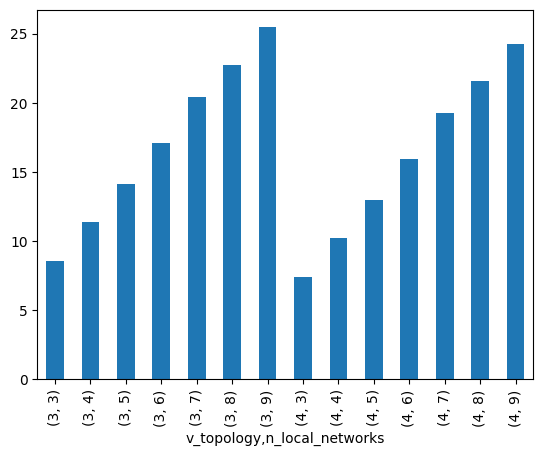

In [39]:
# group by v_topology 'v_topology' and put the mean of the 'n_pair_attractors'
grouped_df = df.groupby(['v_topology', 'n_local_networks'])

# Crear el gráfico de barras
grouped_df['n_local_attractors'].mean().plot(kind='bar')

# Mostrar el gráfico
plt.show()

### Group by Topology and number of local Networks and show the mean of the number of attractor pairs

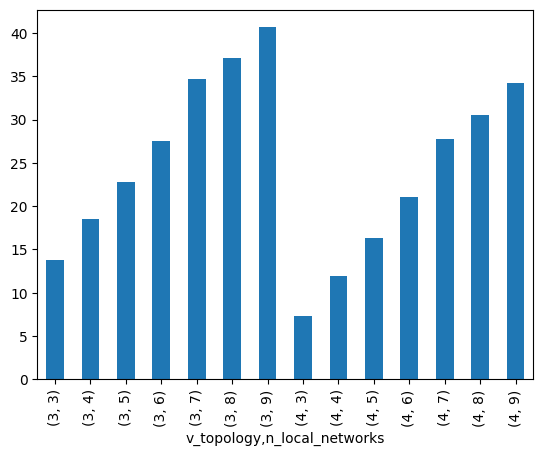

In [40]:
# group by v_topology 'v_topology' and put the mean of the 'n_pair_attractors'
grouped_df = df.groupby(['v_topology', 'n_local_networks'])

# Crear el gráfico de barras
grouped_df['n_pair_attractors'].mean().plot(kind='bar')

# Mostrar el gráfico
plt.show()

### Group by Topology and number of local Networks and show the mean of the number of attractor fields

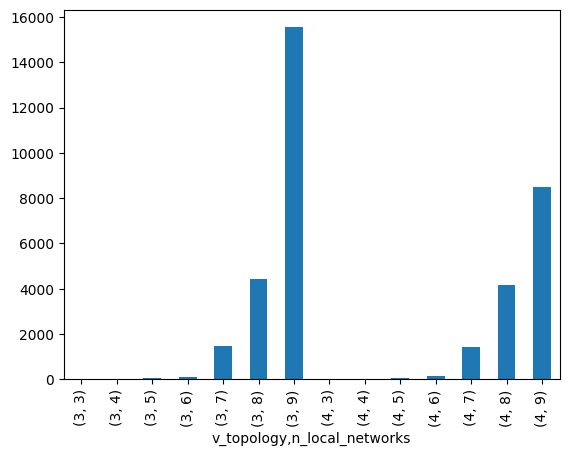

In [41]:
# group by v_topology 'v_topology' and put the mean of the 'n_pair_attractors'
grouped_df = df.groupby(['v_topology', 'n_local_networks'])

# Crear el gráfico de barras
grouped_df['n_attractor_fields'].mean().plot(kind='bar')

# Mostrar el gráfico
plt.show()

## Explore the data by Number of local networks

### Number of local Networks: 3

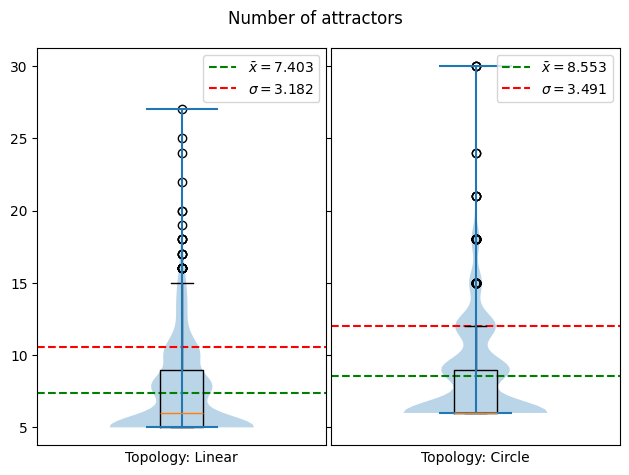

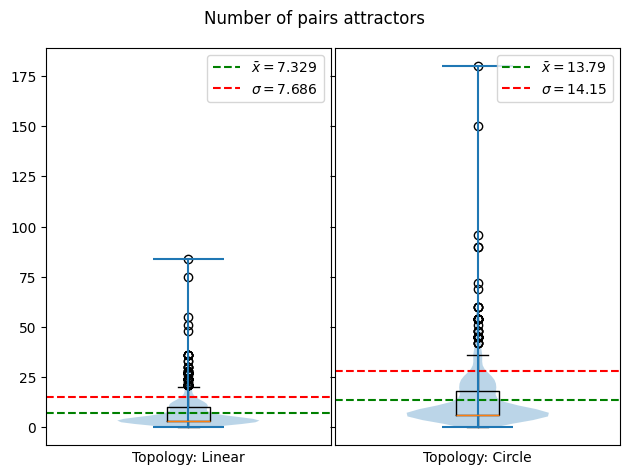

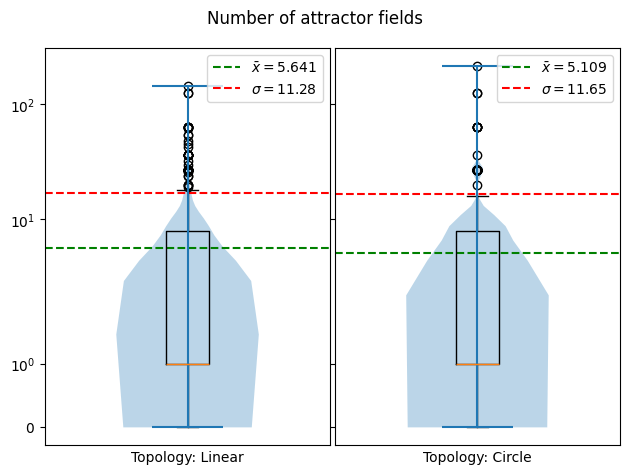

In [42]:
df_local_networks_3 = df[df['n_local_networks'] == 3]
# df_local_networks_3[df_local_networks_3['v_topology'] == 4].describe()
# df_local_networks_3[df_local_networks_3['v_topology'] == 3].describe()

l_topologies = df_local_networks_3['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_3.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_3.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_3.keys()[-6:-3], [
    False,
    False,
    True])}
grouped = df_local_networks_3.groupby("v_topology")

for key in df_local_networks_3.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True)
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)


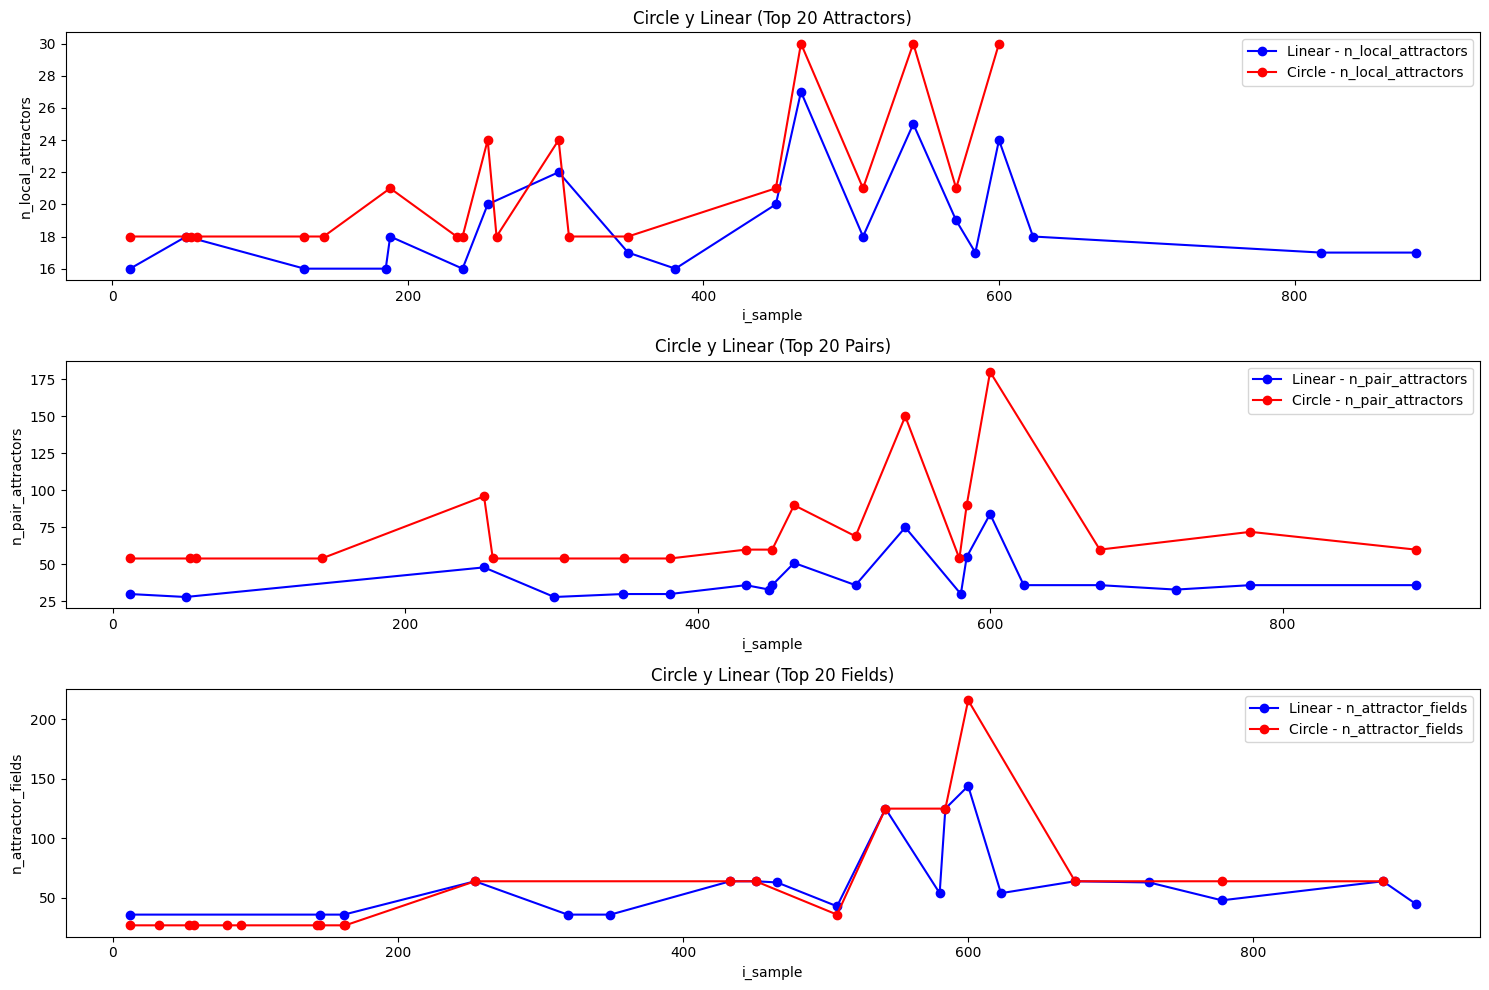

In [92]:
# Filtrar por v_topology
df_v4 = df_local_networks_3[df_local_networks_3['v_topology'] == 4]
df_v3 = df_local_networks_3[df_local_networks_3['v_topology'] == 3]

# Seleccionar los 20 mejores valores de df_v4 y df_v3 para cada métrica
top_20_v4_attractors = df_v4.nlargest(20, 'n_local_attractors')
top_20_v3_attractors = df_v3.nlargest(20, 'n_local_attractors')

top_20_v4_pairs = df_v4.nlargest(20, 'n_pair_attractors')
top_20_v3_pairs = df_v3.nlargest(20, 'n_pair_attractors')

top_20_v4_fields = df_v4.nlargest(20, 'n_attractor_fields')
top_20_v3_fields = df_v3.nlargest(20, 'n_attractor_fields')

# Ordenar los DataFrames por 'i_sample'
top_20_v4_attractors = top_20_v4_attractors.sort_values('i_sample')
top_20_v3_attractors = top_20_v3_attractors.sort_values('i_sample')

top_20_v4_pairs = top_20_v4_pairs.sort_values('i_sample')
top_20_v3_pairs = top_20_v3_pairs.sort_values('i_sample')

top_20_v4_fields = top_20_v4_fields.sort_values('i_sample')
top_20_v3_fields = top_20_v3_fields.sort_values('i_sample')

# Crear gráfico combinado de línea para 'n_local_attractors', 'n_pair_attractors' y 'n_attractor_fields'
plt.figure(figsize=(15, 10))

# Gráfico para 'n_local_attractors'
plt.subplot(3, 1, 1)
plt.plot(top_20_v4_attractors['i_sample'], top_20_v4_attractors['n_local_attractors'], 'o-', color='blue', label='Linear - n_local_attractors')
plt.plot(top_20_v3_attractors['i_sample'], top_20_v3_attractors['n_local_attractors'], 'o-', color='red', label='Circle - n_local_attractors')
plt.title('Circle y Linear (Top 20 Attractors)')
plt.xlabel('i_sample')
plt.ylabel('n_local_attractors')
plt.legend()

# Gráfico para 'n_pair_attractors'
plt.subplot(3, 1, 2)
plt.plot(top_20_v4_pairs['i_sample'], top_20_v4_pairs['n_pair_attractors'], 'o-', color='blue', label='Linear - n_pair_attractors')
plt.plot(top_20_v3_pairs['i_sample'], top_20_v3_pairs['n_pair_attractors'], 'o-', color='red', label='Circle - n_pair_attractors')
plt.title('Circle y Linear (Top 20 Pairs)')
plt.xlabel('i_sample')
plt.ylabel('n_pair_attractors')
plt.legend()

# Gráfico para 'n_attractor_fields'
plt.subplot(3, 1, 3)
plt.plot(top_20_v4_fields['i_sample'], top_20_v4_fields['n_attractor_fields'], 'o-', color='blue', label='Linear - n_attractor_fields')
plt.plot(top_20_v3_fields['i_sample'], top_20_v3_fields['n_attractor_fields'], 'o-', color='red', label='Circle - n_attractor_fields')
plt.title('Circle y Linear (Top 20 Fields)')
plt.xlabel('i_sample')
plt.ylabel('n_attractor_fields')
plt.legend()

plt.tight_layout()
plt.show()


### Number of local Networks: 4

In [ ]:
# Filter the graphs
df_local_networks_4 = df[df['n_local_networks'] == 4]
# df_local_networks_4[df_local_networks_4['v_topology'] == 4].describe()
# df_local_networks_4[df_local_networks_4['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_4['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_4.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_4.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_4.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_4.groupby("v_topology")

for key in df_local_networks_4.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True)
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)

### Number of local Networks: 5

In [ ]:
# Filter the graphs
df_local_networks_5 = df[df['n_local_networks'] == 5]
# df_local_networks_5[df_local_networks_5['v_topology'] == 4].describe()
# df_local_networks_5[df_local_networks_5['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_5['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_5.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_5.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_5.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_5.groupby("v_topology")

for key in df_local_networks_5.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True)
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)

### Number of local Networks: 6

In [ ]:
# Filter the graphs
df_local_networks_6 = df[df['n_local_networks'] == 6]
# df_local_networks_6[df_local_networks_6['v_topology'] == 4].describe()
# df_local_networks_6[df_local_networks_6['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_6['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_6.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_6.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_6.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_6.groupby("v_topology")

for key in df_local_networks_6.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True)
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)

### Number of local Networks: 7

In [ ]:
# Filter the graphs
df_local_networks_7 = df[df['n_local_networks'] == 7]
# df_local_networks_7[df_local_networks_7['v_topology'] == 4].describe()
# df_local_networks_7[df_local_networks_7['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_7['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_7.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_7.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_7.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_7.groupby("v_topology")

for key in df_local_networks_7.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True)
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)

### Number of local Networks: 8

In [ ]:
# Filter the graphs
df_local_networks_8 = df[df['n_local_networks'] == 8]
# df_local_networks_8[df_local_networks_8['v_topology'] == 4].describe()
# df_local_networks_8[df_local_networks_8['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_8['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_8.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_8.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_8.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_8.groupby("v_topology")

for key in df_local_networks_8.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True)
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)

In [ ]:
# Filtrar el DataFrame para v_topology=3 y v_topology=4
df_topology_4 = df_local_networks_8[df_local_networks_8['v_topology'] == 4].set_index(['n_local_networks', 'i_sample'])
df_topology_3 = df_local_networks_8[df_local_networks_8['v_topology'] == 3].set_index(['n_local_networks', 'i_sample'])

# Realizar la resta y crear una nueva columna
df_resume = pd.DataFrame({
    'i_index': df_topology_3.index,
    'circle_local_attractors' : df_topology_3['n_local_attractors'],
    'linear_local_attractors' : df_topology_4['n_local_attractors'],
    'circle_attractors_pairs' : df_topology_3['n_pair_attractors'],
    'linear_attractors_pairs' : df_topology_4['n_pair_attractors'],
    'circle_attractors_fields' : df_topology_3['n_attractor_fields'],
    'linear_attractors_fields' : df_topology_4['n_attractor_fields']
    })
df_resume = df_resume.replace([np.inf, -np.inf], np.nan).dropna()
df_resume.describe()

### Number of local Networks: 9

In [ ]:
# Filter the graphs
df_local_networks_9 = df[df['n_local_networks'] == 9]
# df_local_networks_9[df_local_networks_9['v_topology'] == 4].describe()
# df_local_networks_9[df_local_networks_9['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_9['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_9.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_9.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_9.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_9.groupby("v_topology")

for key in df_local_networks_9.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True)
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)

In [ ]:
# Filtrar el DataFrame para v_topology=3 y v_topology=4
df_topology_4 = df_local_networks_9[df_local_networks_9['v_topology'] == 4].set_index(['n_local_networks', 'i_sample'])
df_topology_3 = df_local_networks_9[df_local_networks_9['v_topology'] == 3].set_index(['n_local_networks', 'i_sample'])

# Realizar la resta y crear una nueva columna
df_resume = pd.DataFrame({
    'i_index': df_topology_3.index,
    'circle_local_attractors' : df_topology_3['n_local_attractors'],
    'linear_local_attractors' : df_topology_4['n_local_attractors'],
    'circle_attractors_pairs' : df_topology_3['n_pair_attractors'],
    'linear_attractors_pairs' : df_topology_4['n_pair_attractors'],
    'circle_attractors_fields' : df_topology_3['n_attractor_fields'],
    'linear_attractors_fields' : df_topology_4['n_attractor_fields']
    })
df_resume = df_resume.replace([np.inf, -np.inf], np.nan).dropna()
df_resume.describe()

In [ ]:
df_resume[['circle_attractors_fields','linear_attractors_fields']]

### Number of local Networks: 10

In [ ]:
# Filter the graphs
df_local_networks_10 = df[df['n_local_networks'] == 10]
# df_local_networks_10[df_local_networks_10['v_topology'] == 4].describe()
# df_local_networks_10[df_local_networks_10['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_10['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_10.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_10.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_10.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_10.groupby("v_topology")

for key in df_local_networks_10.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True)
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)

### Number of local Networks: 11

In [ ]:
# Filter the graphs
df_local_networks_11 = df[df['n_local_networks'] == 11]
# df_local_networks_11[df_local_networks_11['v_topology'] == 4].describe()
# df_local_networks_11[df_local_networks_11['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_11['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_11.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_11.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_11.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_11.groupby("v_topology")

for key in df_local_networks_11.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True)
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)

### Number of local Networks: 12

In [ ]:
# Filter the graphs
df_local_networks_12 = df[df['n_local_networks'] == 12]
# df_local_networks_12[df_local_networks_12['v_topology'] == 4].describe()
# df_local_networks_12[df_local_networks_12['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_12['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_12.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_12.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_12.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_12.groupby("v_topology")

for key in df_local_networks_12.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True)
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)

### Number of local Networks: 13

In [ ]:
# Filter the graphs
df_local_networks_13 = df[df['n_local_networks'] == 13]
# df_local_networks_13[df_local_networks_13['v_topology'] == 4].describe()
# df_local_networks_13[df_local_networks_13['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_13['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_13.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_13.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_13.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_13.groupby("v_topology")

for key in df_local_networks_13.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True)
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)

### Number of local Networks: 14

In [44]:
# Filter the graphs
df_local_networks_14 = df[df['n_local_networks'] == 14]
# df_local_networks_14[df_local_networks_14['v_topology'] == 4].describe()
# df_local_networks_14[df_local_networks_14['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_14['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_14.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_14.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_14.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_14.groupby("v_topology")

for key in df_local_networks_14.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True)
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)

ValueError: Number of columns must be a positive integer, not 0

<Figure size 640x480 with 0 Axes>

### Number of local Networks: 15

In [45]:
# Filter the graphs
df_local_networks_15 = df[df['n_local_networks'] == 15]
# df_local_networks_15[df_local_networks_15['v_topology'] == 4].describe()
# df_local_networks_15[df_local_networks_15['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_15['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_15.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_15.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_15.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_15.groupby("v_topology")

for key in df_local_networks_15.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True)
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)

ValueError: Number of columns must be a positive integer, not 0

<Figure size 640x480 with 0 Axes>

## Explore all the data

In [46]:
# Filtrar el DataFrame para v_topology=3 y v_topology=4
df_topology_4 = df[df['v_topology'] == 4].set_index(['n_local_networks', 'i_sample'])
df_topology_3 = df[df['v_topology'] == 3].set_index(['n_local_networks', 'i_sample'])

# Realizar la resta y crear una nueva columna
df_resume = pd.DataFrame({
    'i_index': df_topology_3.index,
    'circle_local_attractors' : df_topology_3['n_local_attractors'],
    'linear_local_attractors' : df_topology_4['n_local_attractors'],
    'circle_attractors_pairs' : df_topology_3['n_pair_attractors'],
    'linear_attractors_pairs' : df_topology_4['n_pair_attractors'],
    'circle_attractors_fields' : df_topology_3['n_pair_attractors'],
    'linear_attractors_fields' : df_topology_4['n_pair_attractors']
    })
    # 'dif_local_attractors': df_topology_3['n_local_attractors'] - df_topology_4['n_local_attractors'],
    # 'dif_attractor_pairs': df_topology_3['n_pair_attractors'] - df_topology_4['n_pair_attractors'],
    # 'dif_attractor_fields': df_topology_3['n_attractor_fields'] - df_topology_4['n_attractor_fields'],
    # 'percent_local_attractors': (df_topology_3['n_local_attractors'] / (
    #         df_topology_4['n_local_attractors'].mean() + df_topology_3['n_local_attractors'].mean())) * 100,
    # 'percent_attractor_pairs': (df_topology_3['n_pair_attractors'] / (
    #         df_topology_4['n_pair_attractors'].mean() + df_topology_3['n_pair_attractors'].mean())) * 100,
    # 'percent_attractor_fields': (df_topology_3['n_attractor_fields'] / df_topology_4['n_attractor_fields'].mean() +
    #                              df_topology_3['n_attractor_fields'].mean()) * 100
    # 'percent_local_attractors': (df_topology_3['n_local_attractors'] / (
    #         df_topology_4['n_local_attractors'] + df_topology_3['n_local_attractors'])) * 100,
    # 'percent_attractor_pairs': (df_topology_3['n_pair_attractors'] / (
    #         df_topology_4['n_pair_attractors'] + df_topology_3['n_pair_attractors'])) * 100,
    # 'percent_attractor_fields': (df_topology_3['n_attractor_fields'] / df_topology_4['n_attractor_fields'] +
    #                              df_topology_3['n_attractor_fields']) * 100
    # 'percent_local_attractors': (df_topology_3['n_local_attractors'] / (
    #         df_topology_4['n_local_attractors'] + df_topology_3['n_local_attractors'])),
    # 'percent_attractor_pairs': (df_topology_3['n_pair_attractors'] / (
    #         df_topology_4['n_pair_attractors'] + df_topology_3['n_pair_attractors'])),
    # # 'percent_attractor_fields': (df_topology_3['n_attractor_fields'] / (df_topology_4['n_attractor_fields'] +
    # #                              df_topology_3['n_attractor_fields'])),
    # 'percent_attractor_fields_linear': (df_topology_4['n_attractor_fields'] / (df_topology_4['n_attractor_fields'] +
    #                              df_topology_3['n_attractor_fields'])),
    # 'percent_attractor_fields_circle': (df_topology_3['n_attractor_fields'] / (df_topology_4['n_attractor_fields'] +
    #                              df_topology_3['n_attractor_fields'])),

# Mostrar el DataFrame resultante

df_resume = df_resume.replace([np.inf, -np.inf], np.nan).dropna()
df_resume
# 
# # abc = df_topology_3['n_attractor_fields'].max() / (
# #         df_topology_3['n_attractor_fields'].max() + df_topology_4['n_attractor_fields'].max()) * 100
# # abc
# abc = df_topology_3['n_attractor_fields'].mean() / (
#         df_topology_3['n_attractor_fields'].mean() + df_topology_4['n_attractor_fields'].mean()) * 100
# abc
# abc = df_topology_3['n_attractor_fields'].min() / (
#         df_topology_3['n_attractor_fields'].min() + df_topology_4['n_attractor_fields'].min()) * 100
# abc

i_index  circle_local_attractors  \
n_local_networks i_sample                                       
3                1            (3, 1)                       12   
                 2            (3, 2)                        6   
                 3            (3, 3)                       12   
                 4            (3, 4)                        9   
                 5            (3, 5)                        6   
...                              ...                      ...   
9                996        (9, 996)                       18   
                 997        (9, 997)                       18   
                 998        (9, 998)                       18   
                 999        (9, 999)                       36   
                 1000      (9, 1000)                       36   

                           linear_local_attractors  circle_attractors_pairs  \
n_local_networks i_sample                                                     
3                1                              10                       24   
                 2                               5                        6   
                 3                              10                       24   
                 4                               8                        9   
                 5                               5                        6   
...                                            ...                      ...   
9                996                            17                       18   
                 997                            17                       18   
                 998                            17                       18   
                 999                            34                       72   
                 1000                           34                       72   

                           linear_attractors_pairs  circle_attractors_fields  \
n_local_networks i_sample                                                      
3                1                              12                        24   
                 2                               3                         6   
                 3                              12                        24   
                 4                               5                         9   
                 5                               3                         6   
...                                            ...                       ...   
9                996                            15                        18   
                 997                            15                        18   
                 998                            15                        18   
                 999                            60                        72   
                 1000                           60                        72   

                           linear_attractors_fields  
n_local_networks i_sample                            
3                1                               12  
                 2                                3  
                 3                               12  
                 4                                5  
                 5                                3  
...                                             ...  
9                996                             15  
                 997                             15  
                 998                             15  
                 999                             60  
                 1000                            60  

[7000 rows x 7 columns]

In [47]:
df_resume.describe()

,circle_local_attractors,linear_local_attractors,circle_attractors_pairs,linear_attractors_pairs,circle_attractors_fields,linear_attractors_fields
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,17.113143,15.942429,27.891286,21.300143,27.891286,21.300143
std,9.148131,8.860283,32.228326,26.186655,32.228326,26.186655
min,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000,7.000000,10.000000,7.000000
50%,15.000000,14.000000,16.000000,13.000000,16.000000,13.000000
75%,21.000000,19.000000,32.000000,23.000000,32.000000,23.000000
max,96.000000,90.000000,576.000000,468.000000,576.000000,468.000000


In [48]:
# compute the difference
# df_resume[['dif_local_attractors', 'dif_attractor_pairs', 'dif_attractor_fields']].mean()

In [49]:
# compute the percent
# df_resume[['percent_local_attractors', 'percent_attractor_pairs', 'percent_attractor_fields']].mean()

In [50]:
# df_resume[['dif_attractor_fields','percent_attractor_fields_circle','percent_attractor_fields_linear']]